In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
sales_data = pd.read_csv('Amazon Sales Data.csv')
sales_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [7]:
# Check for missing values
missing_values = sales_data.isnull().sum()
missing_values

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [8]:
# Remove rows with missing values
sales_data_cleaned = sales_data.dropna()
sales_data_cleaned

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [9]:
# Display total values of all country 
pd.set_option('display.max_rows', None)
sales_data['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

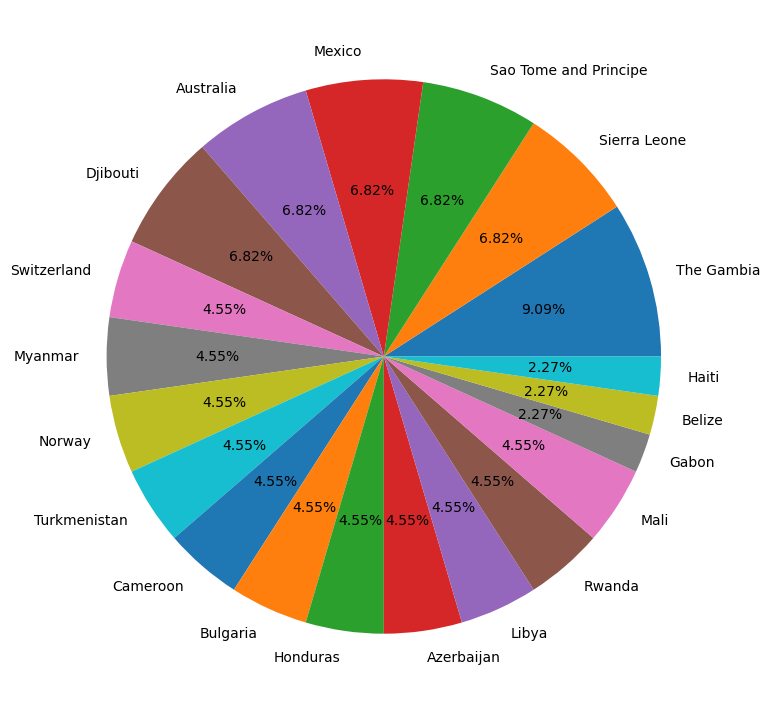

In [10]:
country_names = sales_data.Country.value_counts().index
country_val = sales_data.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

In [7]:
# Remove duplicates
sales_data_cleaned = sales_data_cleaned.drop_duplicates()

In [12]:
# Standardize date format (assuming 'date' column contains date information)
sales_data_cleaned['Order Date'] = pd.to_datetime(sales_data_cleaned['Order Date'])
sales_data_cleaned['Order Date']

0    2010-05-28
1    2012-08-22
2    2014-05-02
3    2014-06-20
4    2013-02-01
        ...    
95   2011-07-26
96   2011-11-11
97   2016-06-01
98   2015-07-30
99   2012-02-10
Name: Order Date, Length: 100, dtype: datetime64[ns]

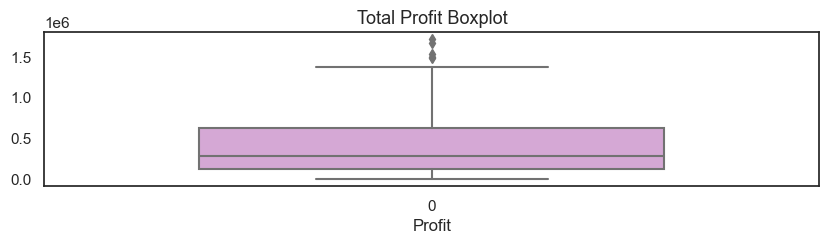

In [11]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(sales_data['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [12]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [13]:
outliers = detect_outliers(sales_data, sales_data["Total Profit"])

Region            Central America and the Caribbean
Country                                    Honduras
Item Type                                 Household
Sales Channel                               Offline
Order Priority                                    H
Order Date                                 2/8/2017
Order ID                                  522840487
Ship Date                                 2/13/2017
Units Sold                                     8974
Unit Price                                   668.27
Unit Cost                                    502.54
Total Revenue                            5997054.98
Total Cost                               4509793.96
Total Profit                             1487261.02
Name: 13, dtype: object
Region                 Europe
Country           Switzerland
Item Type           Cosmetics
Sales Channel         Offline
Order Priority              M
Order Date          9/17/2012
Order ID            249693334
Ship Date          10/20/2012
Units So

In [25]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [26]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


# boxplot

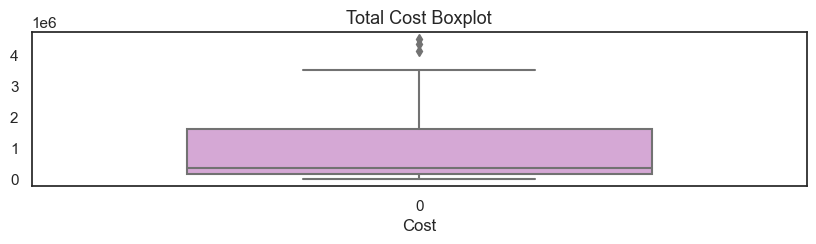

In [27]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(sales_data['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()

In [14]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [17]:
outliers = detect_outliers(sales_data, sales_data["Total Profit"])

Region            Central America and the Caribbean
Country                                    Honduras
Item Type                                 Household
Sales Channel                               Offline
Order Priority                                    H
Order Date                                 2/8/2017
Order ID                                  522840487
Ship Date                                 2/13/2017
Units Sold                                     8974
Unit Price                                   668.27
Unit Cost                                    502.54
Total Revenue                            5997054.98
Total Cost                               4509793.96
Total Profit                             1487261.02
Name: 13, dtype: object
Region                 Europe
Country           Switzerland
Item Type           Cosmetics
Sales Channel         Offline
Order Priority              M
Order Date          9/17/2012
Order ID            249693334
Ship Date          10/20/2012
Units So

In [18]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


In [16]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


# Box Plot For Unit Cost

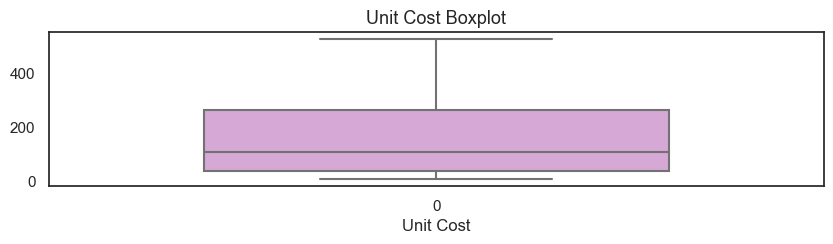

In [20]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(sales_data['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

# Box Plot For Unit Price

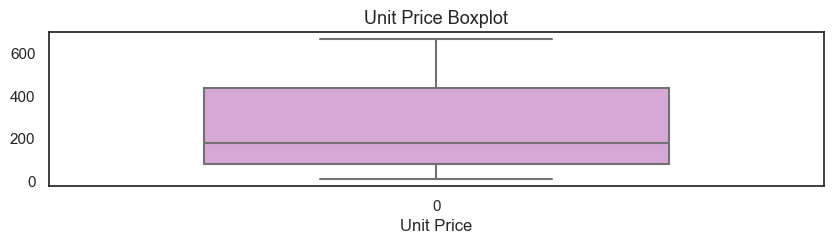

In [21]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(sales_data['Unit Price'], color="plum", width=.6)
plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()

# Box Plot For Unit Sold

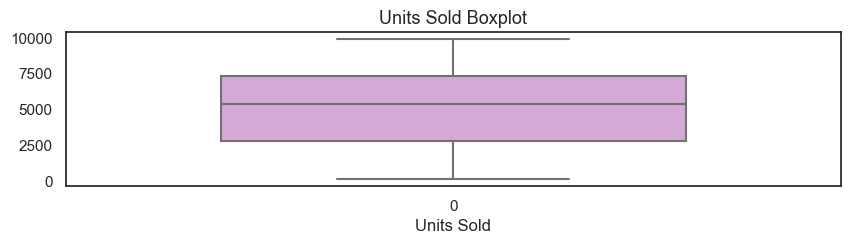

In [23]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(sales_data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\4091266898.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Order Month'] = sales_data['Order Date'].dt.to_period('M')


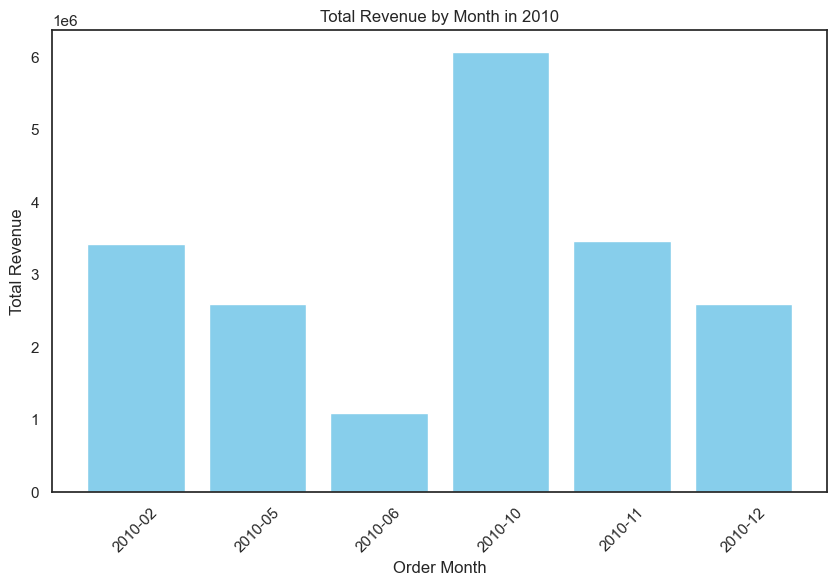

In [29]:
# Ensure 'Order Date' is in datetime format
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

# Filter the data for a specific year, e.g., 2010
sales_data = sales_data[sales_data['Order Date'].dt.year == 2010]

# Extract month and year from 'Order Date'
sales_data['Order Month'] = sales_data['Order Date'].dt.to_period('M')

# Aggregate total revenue by order month
revenue_by_month = sales_data.groupby('Order Month')['Total Revenue'].sum().reset_index()

# Convert 'Order Month' to a string for better plotting
revenue_by_month['Order Month'] = revenue_by_month['Order Month'].astype(str)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(revenue_by_month['Order Month'], revenue_by_month['Total Revenue'], color='skyblue')

# Set the chart title and axis labels
plt.title('Total Revenue by Month in 2010')
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

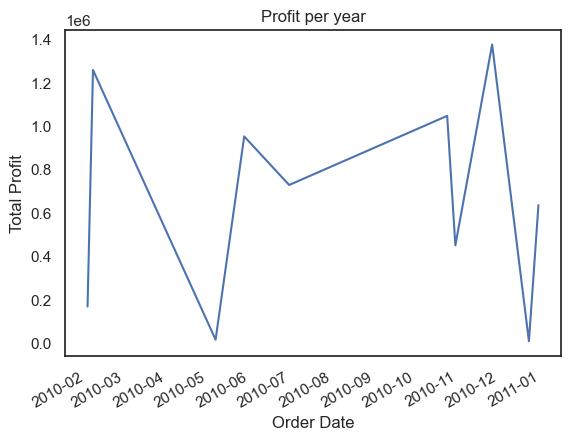

In [32]:
# Plot line graph of Total Profit and Order Year
sales_data.groupby('Order Date')['Total Profit'].mean().plot()
plt.xlabel('Order Date')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [34]:
# Calculating the total revenue for each group with respect to Item Type and then sorting then in descending order
revenue_by_category = sales_data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Item Type
Cosmetics          6620956.80
Office Supplies    5396577.27
Household          2559474.10
Baby Food          2533654.00
Clothes            1998731.20
Fruits               54319.26
Personal Care        22312.29
Name: Total Revenue, dtype: float64

In [36]:
# Calculating the total profit for each group with respect to Item Type and then sorting then in descending order
profit_by_category = sales_data.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category

Item Type
Cosmetics          2633087.28
Clothes            1343217.60
Office Supplies    1046233.75
Baby Food           951410.50
Household           634745.90
Fruits               14031.02
Personal Care         6841.38
Name: Total Profit, dtype: float64

In [38]:
# Calculating correlation of 'Total Revenue', 'Total Cost' and 'Total Profit' columns present in dataframe
print(sales_data[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.981870      0.847939
Total Cost          0.981870    1.000000      0.732081
Total Profit        0.847939    0.732081      1.000000


# Correlation Matrix

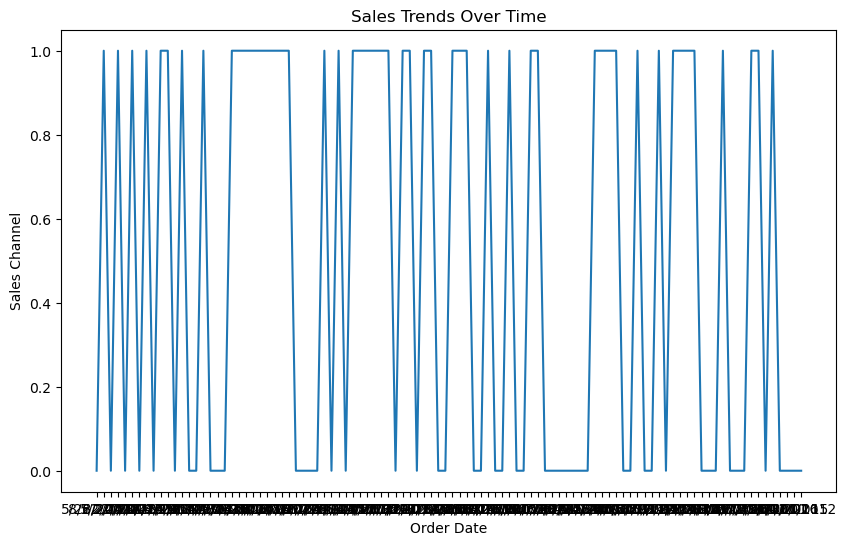

C:\Users\DELL\AppData\Local\Temp\ipykernel_16116\2273300494.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_data_cleaned.corr()


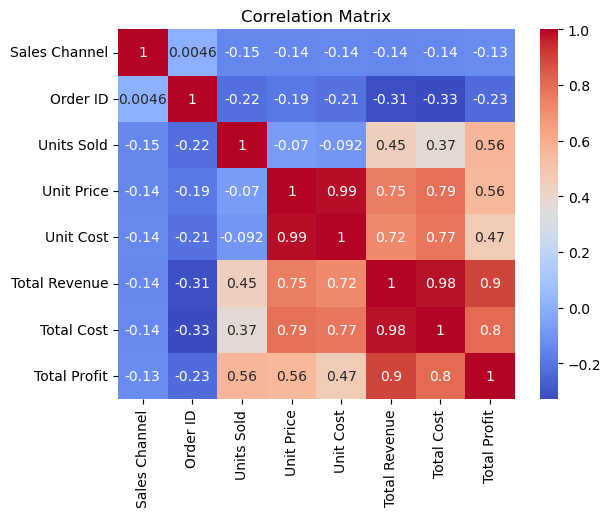

In [10]:
# Summary statistics
summary_stats = sales_data_cleaned.describe()

# Visualize sales trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Date', y='Sales Channel', data=sales_data_cleaned)
plt.title('Sales Trends Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales Channel')
plt.show()

# Correlation matrix
correlation_matrix = sales_data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:

# Check for non-numeric values in 'Sales Channel' and 'Unit Price' columns
print(sales_data_cleaned.dtypes)
non_numeric_sales_channel = sales_data_cleaned[~sales_data_cleaned['Sales Channel'].astype(str).str.isdigit()]
non_numeric_unit_price = sales_data_cleaned[~sales_data_cleaned['Unit Price'].astype(str).str.isdigit()]

# Print non-numeric values if any
print("Non-numeric values in 'Sales Channel':")
print(non_numeric_sales_channel)
print("\nNon-numeric values in 'Unit Price':")
print(non_numeric_unit_price)

# Convert 'Unit Price' column to numeric
sales_data_cleaned['Unit Price'] = pd.to_numeric(sales_data_cleaned['Unit Price'], errors='ignore')

# Drop rows with missing or non-numeric values in 'Unit Price' column
sales_data_cleaned = sales_data_cleaned.dropna(subset=['Unit Price'])

# Compute Pearson correlation coefficient between 'Sales Channel' and 'Unit Price'
correlation_coefficient, p_value = pearsonr(sales_data_cleaned['Sales Channel'], sales_data_cleaned['Unit Price'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}, p-value: {p_value}")




Region             object
Country            object
Item Type          object
Sales Channel       int64
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object
Non-numeric values in 'Sales Channel':
Empty DataFrame
Columns: [Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit]
Index: []

Non-numeric values in 'Unit Price':
                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                 

# Predictive model

In [13]:
# Split data into features (X) and target variable (y)
X = sales_data_cleaned[['Unit Price']]
y = sales_data_cleaned['Sales Channel']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.23712050097705042


# Visulizatoin

In [40]:
# Label Encoding of Item Type, Sales Channel and Order Priority for model training 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
sales_data["Item Type"] = le.fit_transform(sales_data["Item Type"])
sales_data["Sales Channel"] = le.fit_transform(sales_data["Sales Channel"])
sales_data["Order Priority"] = le.fit_transform(sales_data["Order Priority"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\776271841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["Item Type"] = le.fit_transform(sales_data["Item Type"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\776271841.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data["Sales Channel"] = le.fit_transform(sales_data["Sales Channel"])
C:\Users\DELL\AppData\Local\Temp\ipykernel_2268\776271841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [41]:
sales_data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month
0,Australia and Oceania,Tuvalu,0,0,1,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010-05
18,Asia,Turkmenistan,4,0,2,2010-12-30,441619336,1/20/2011,3830,668.27,502.54,2559474.10,1924728.20,634745.90,2010-12
27,Sub-Saharan Africa,Mali,3,1,2,2010-05-07,686048400,5/10/2010,5822,9.33,6.92,54319.26,40288.24,14031.02,2010-05
41,Middle East and North Africa,Azerbaijan,2,1,3,2010-02-06,382392299,2/25/2010,7234,437.20,263.33,3162704.80,1904929.22,1257775.58,2010-02
47,Europe,Switzerland,6,1,3,2010-12-23,617667090,1/31/2011,273,81.73,56.67,22312.29,15470.91,6841.38,2010-12


In [8]:
# Storing sales_data dataframe in sales_data_auto_ml for performing (Auto ML) Pycaret library 
sales_data_auto_ml = sales_data

In [51]:
pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import * to train dataframe on multiple regression algorithm  
from pycaret.regression import *

In [10]:
# Set target value
reg = setup(data=sales_data_auto_ml,target='Total Profit')

,Description,Value
0,Session id,1337
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 14)"
4,Transformed data shape,"(100, 34)"
5,Transformed train set shape,"(70, 34)"
6,Transformed test set shape,"(30, 34)"
7,Numeric features,6
8,Categorical features,7
9,Preprocess,True


In [11]:
# Comparing multiple models 
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,0.0513,0.0079,0.0760,1.0000,0.0000,0.0000,0.1100
omp,Orthogonal Matching Pursuit,0.0425,0.0059,0.0639,1.0000,0.0000,0.0000,0.1230
ridge,Ridge Regression,26065.7747,1021275072.5076,30747.2197,0.9928,0.5718,1.0336,0.1100
huber,Huber Regressor,124552.7406,39727736075.6340,176784.5957,0.6955,0.7270,1.1488,0.1310
lightgbm,Light Gradient Boosting Machine,224865.1177,84278081539.3498,278321.3064,0.3739,1.4114,9.8066,0.2470
et,Extra Trees Regressor,352539.2316,189072007081.4872,417796.3866,-0.3464,1.6935,13.8901,0.2440
lasso,Lasso Regression,356100.3436,191510240473.3705,420156.3517,-0.3483,1.7091,14.2252,0.1050
en,Elastic Net,369094.1230,205588634847.6100,435506.1015,-0.4536,1.7376,14.7405,0.1030
lr,Linear Regression,369140.2147,205635503932.0084,435559.7172,-0.4541,1.7377,14.7438,1.3040
dummy,Dummy Regressor,369140.1891,205635493068.8000,435559.7031,-0.4541,1.7377,14.7438,0.1070


LassoLars(random_state=1337)

In [12]:
# Using Lasso Least Angle Regression algorithm to train model 
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0343,0.0029,0.0541,1.0000,0.0000,0.0000
1,0.0728,0.0084,0.0917,1.0000,0.0000,0.0000
2,0.0331,0.0015,0.0381,1.0000,0.0000,0.0000
3,0.0975,0.0208,0.1444,1.0000,0.0000,0.0000
4,0.0482,0.0052,0.0722,1.0000,0.0000,0.0000
5,0.0927,0.0291,0.1705,1.0000,0.0000,0.0000
6,0.0266,0.0012,0.0341,1.0000,0.0000,0.0000
7,0.0544,0.0059,0.0767,1.0000,0.0000,0.0000
8,0.0373,0.0035,0.0593,1.0000,0.0000,0.0000


In [13]:
# Tuning the model for better performance 
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0326,0.0015,0.0388,1.0000,0.0000,0.0000
1,0.0376,0.0018,0.0424,1.0000,0.0000,0.0000
2,0.0309,0.0015,0.0384,1.0000,0.0000,0.0000
3,0.0811,0.0156,0.1248,1.0000,0.0000,0.0000
4,0.0609,0.0080,0.0892,1.0000,0.0000,0.0000
5,0.0925,0.0228,0.1509,1.0000,0.0000,0.0000
6,0.0248,0.0010,0.0311,1.0000,0.0000,0.0000
7,0.0472,0.0046,0.0682,1.0000,0.0000,0.0000
8,0.0570,0.0071,0.0844,1.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


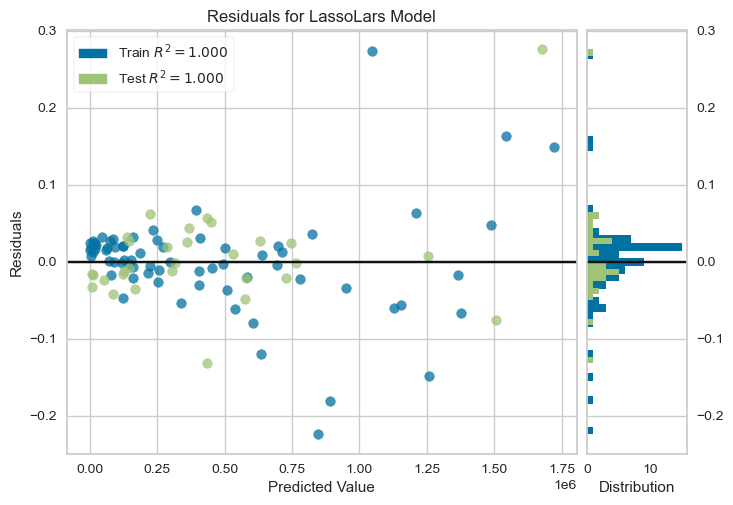

In [14]:
# Plot residuals for Lasso Least Angle Regression based trained model 
plot_model(tuned_llar_model)

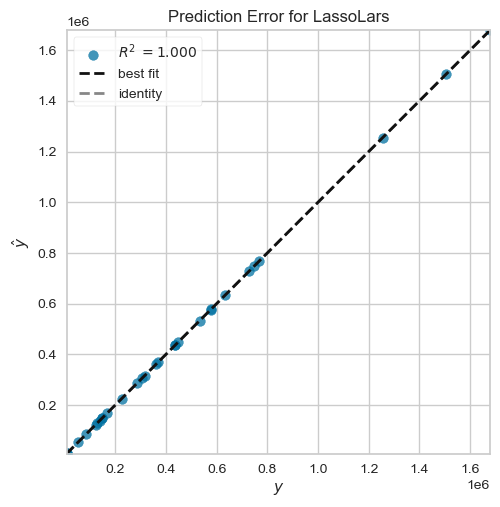

In [15]:
# Plot prediction error plot for Lasso Least Angle Regression based trained model 
plot_model(tuned_llar_model, plot="error")

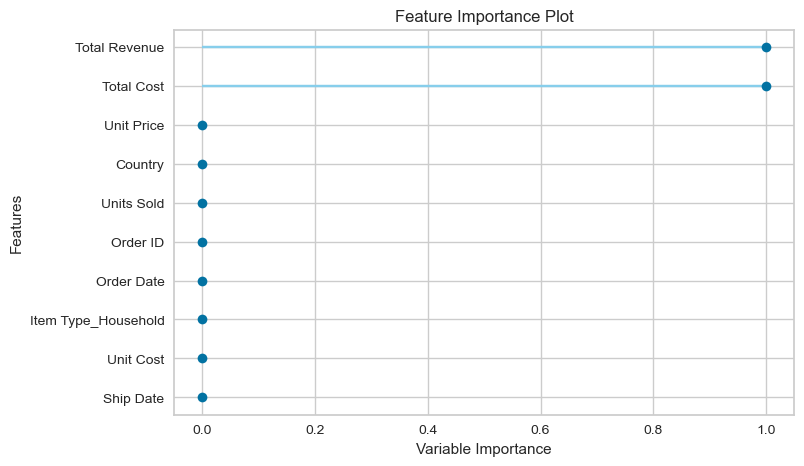

In [16]:
# Plot feature importance plot 
plot_model(tuned_llar_model,plot='feature')